# Assignment 1

# Team Name : Spritzer

Team member:  
1) Ahmad Nizam Mohd Lazim (MAN171058)  
2) Muhammad Nidzam Maso'od (MAN171043)  
3) Mohammad Nurihan Salikin (MAN171032)  

**Report objectives: **  
We want to analyze what factor that can cause customer to churn and try to provide some solution to retain the customer.

For this report we will cover   
1) Data pre processing (Loading and Cleansing)  
2) Data analysis and visualization  
3) Meaningful patterns  
4) Prediction analytics   
5) Communication strategies  
6) CEO summarized report

## Data pre processing (Loading and Cleansing)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import sklearn as sk
import scipy.stats as stats
import time

During initial check up of the file, we found out there is a few blank cells, so we set the null value as blank cell when we load the file

In [2]:
churn= pd.read_csv('C:/Users/masoodm/Documents/Python UTM learning/Telco-Customer-Churn.csv',na_values=[" "])

#check and remove null
print('Before removing null')
print(churn.isnull().sum())

Before removing null
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


We found out there are 11 blank cells and we proceed to remove this linefrom our data.

In [3]:
print('After removing null')
churn = churn.dropna()
print(churn.isnull().sum())
churn.head(5).T

After removing null
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
churn.shape

(7032, 21)

From the above, for this set of data we have 7032 rows and 21 columns.

In [5]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
churn['SeniorCitizen']=pd.Categorical(churn['SeniorCitizen']) #Changing from int to categorical
churn.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [7]:
del churn["customerID"] # Deleting the custumerID column
churn.head(1).T

,0
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,No
tenure,1
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,No
OnlineBackup,Yes


For our analysis, we will devide our analysis based on the data type which is numerical and categorical

In [8]:
numerics = ['float64', 'int64']
numeric_ds = churn.select_dtypes(include=numerics)
objects_ds = churn.select_dtypes(exclude=numerics)
print('showing numeric columns')
print(numeric_ds.columns)
print("")
print('showing categorical columns')
print(objects_ds.columns)

showing numeric columns
Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

showing categorical columns
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


1.There is only 3 Variables that containing numerical values.  
a) tenure  
b) MonthlyCharges  
c) TotalCharges  

### Numerical analysis

below are the stats for No churn
           tenure
count  5163.00000
mean     37.65001
std      24.07694
min       1.00000
25%      15.00000
50%      38.00000
75%      61.00000
max      72.00000
 
below are the stats for Yes churn
            tenure
count  1869.000000
mean     17.979133
std      19.531123
min       1.000000
25%       2.000000
50%      10.000000
75%      29.000000
max      72.000000
below are the stats for No churn
       MonthlyCharges
count     5163.000000
mean        61.307408
std         31.094557
min         18.250000
25%         25.100000
50%         64.450000
75%         88.475000
max        118.750000
 
below are the stats for Yes churn
       MonthlyCharges
count     1869.000000
mean        74.441332
std         24.666053
min         18.850000
25%         56.150000
50%         79.650000
75%         94.200000
max        118.350000
below are the stats for No churn
       TotalCharges
count   5163.000000
mean    2555.344141
std     2329.456984
min       18.800000


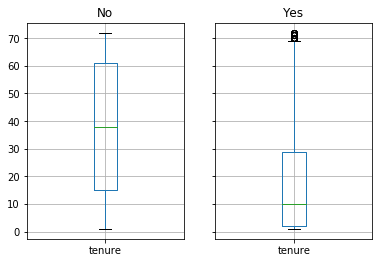

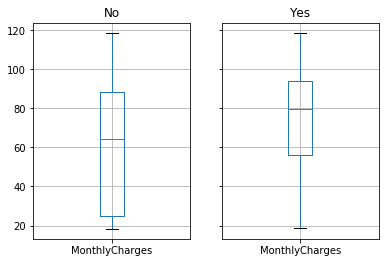

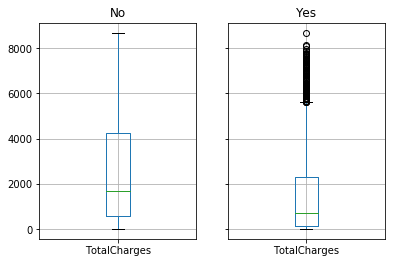

In [9]:
x_tenure=churn.loc[:,['tenure','Churn']]
x_mothlycharges=churn.loc[:,['MonthlyCharges','Churn']]
x_totalcharges=churn.loc[:,['TotalCharges','Churn']]
# create statistic function
def stats(x):
    No_stats=x[x['Churn']=='No']
    print('below are the stats for No churn')
    print(No_stats.describe())
    print(' ')
    #stats for Yes churn
    Yes_stats=x[x['Churn']=='Yes']
    print('below are the stats for Yes churn')
    print(Yes_stats.describe())
    z=x.groupby('Churn')
    z.boxplot(return_type='dict')
    
stats(x_tenure)
stats(x_mothlycharges)
stats(x_totalcharges)

In [10]:
import scipy.stats as stats
x_tenure=churn.loc[:,['tenure','Churn']]
x_mothlycharges=churn.loc[:,['MonthlyCharges','Churn']]
x_totalcharges=churn.loc[:,['TotalCharges','Churn']]

In [11]:
x=x_tenure
No_stats=x[x['Churn']=='No']
Yes_stats=x[x['Churn']=='Yes']
sample1 = No_stats['tenure']
sample2 = Yes_stats['tenure']
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=True)
print("t value for tenure No and Yes comparison= " + str(t_stat))
print("p value for tenure No and Yes comparison= " + str(p_val))

t value for tenure No and Yes comparison= 31.741289063447653
p value for tenure No and Yes comparison= 9.437650217574845e-207


In [12]:
x=x_mothlycharges
No_stats=x[x['Churn']=='No']
Yes_stats=x[x['Churn']=='Yes']
sample1 = No_stats['MonthlyCharges']
sample2 = Yes_stats['MonthlyCharges']
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=True)
print("t value for MonthlyCharges No and Yes comparison= " + str(t_stat))
print("p value for MonthlyCharges No and Yes comparison= " + str(p_val))

t value for MonthlyCharges No and Yes comparison= -16.47959313114872
p value for MonthlyCharges No and Yes comparison= 6.760843117980302e-60


In [13]:
x=x_totalcharges
No_stats=x[x['Churn']=='No']
Yes_stats=x[x['Churn']=='Yes']
sample1 = No_stats['TotalCharges']
sample2 = Yes_stats['TotalCharges']
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=True)
print("t value for TotalCharges No and Yes comparison= " + str(t_stat))
print("p value for TotalCharges No and Yes comparison= " + str(p_val))

t value for TotalCharges No and Yes comparison= 17.068827211220274
p value for TotalCharges No and Yes comparison= 4.876865689694505e-64


**Interpreting t-value:  **
The t-value measures the size of the difference relative to the variation in your sample data. Put another way, T is simply the calculated difference represented in units of standard error. The greater the magnitude of T (it can be either positive or negative), the greater the evidence against the null hypothesis that there is no significant difference. The closer T is to 0, the more likely there isn't a significant difference.  
  
**Interpreting p-value:  **
p-value is very low (< alpha level), you reject the null hypothesis and conclude that there's a statistically significant difference.

Based from ttest result, all numeric variables will have significant different in the mean between Yes and No churn.  

_Describtion analytics _

**a) Tenure **
•The shortest tenure in the dataset was 1 month while the longest was 72 months  
•Averages period for loyal subscriber was 37 months (year-3), but customer customer also tend to choose different provider in year-2 (17 months) 
•however, based on boxplot above the customers who already subscribed for a long time are may churn to different provide. 

**b) Monthly charges **
•The highest packages charges to customer was 118.35 and the cheapest packages prices was 18.25
•Average monthly subscription package price was 64.76
•customer subscribe with more expensive than average are most likely to churn (average 74.4).

**c) Total Charges **
•these number are not really significant for the analysis because the longer the customer subscribed with expensive plan, the higher the total charges




A violin plot is a method of plotting numeric data. It is similar to box plot with a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values (in the simplest case this could be a histogram).

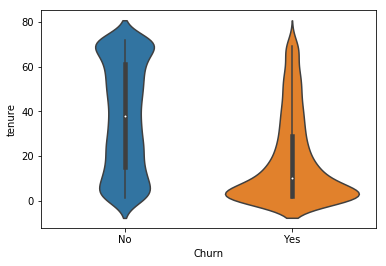

In [14]:
sns.violinplot(x="Churn", y="tenure", data=churn);

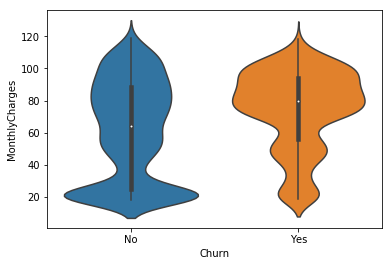

In [15]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=churn);

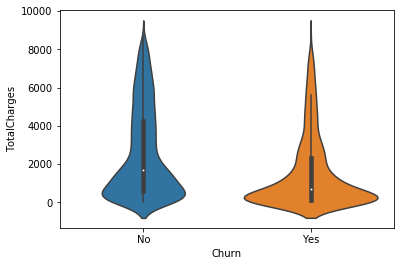

In [16]:
sns.violinplot(x="Churn", y="TotalCharges", data=churn);

### Categorical analysis

Overview of the categorical plot

In [17]:
z=len(objects_ds.columns)
z
objects_ds.columns[0:-1]

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

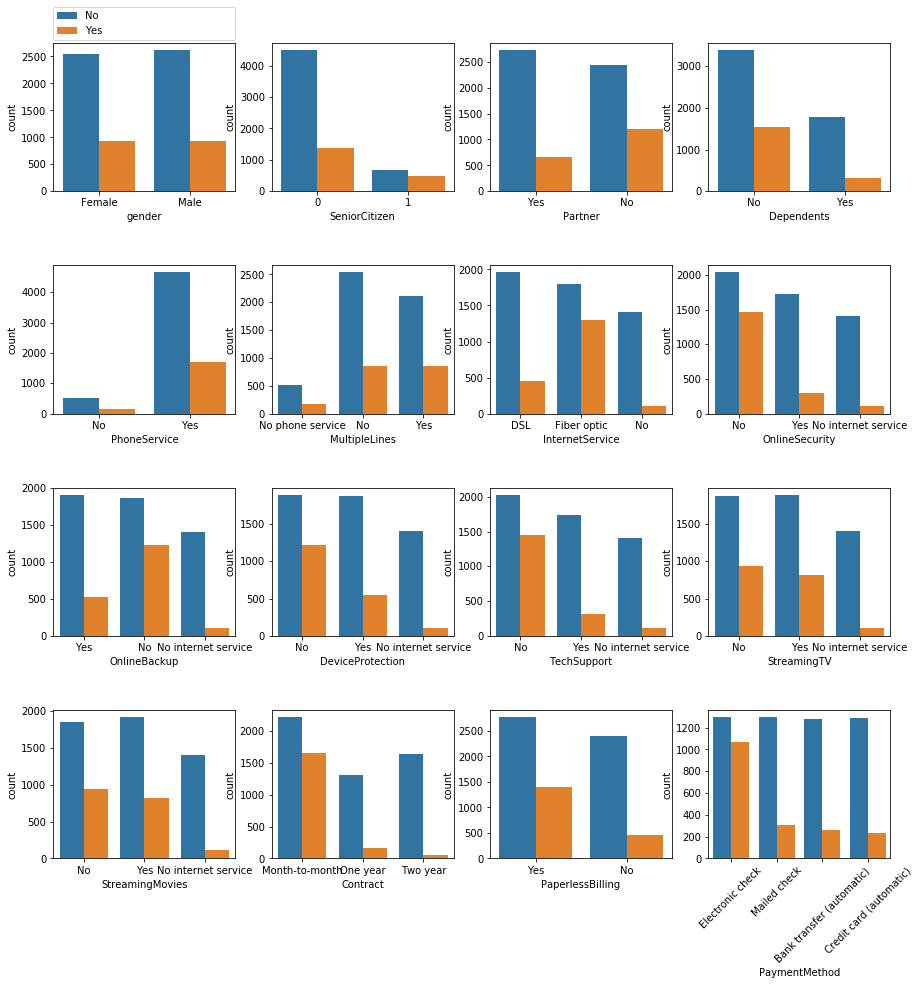

In [18]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

                  Churn
gender Churn           
Female No     73.040482
       Yes    26.959518
Male   No     73.795435
       Yes    26.204565
                         Churn
SeniorCitizen Churn           
0             No     76.349745
              Yes    23.650255
1             No     58.318739
              Yes    41.681261
                   Churn
Partner Churn           
No      No     67.023908
        Yes    32.976092
Yes     No     80.282935
        Yes    19.717065
                      Churn
Dependents Churn           
No         No     68.720860
           Yes    31.279140
Yes        No     84.468795
           Yes    15.531205
                        Churn
PhoneService Churn           
No           No     75.000000
             Yes    25.000000
Yes          No     73.252519
             Yes    26.747481
                            Churn
MultipleLines    Churn           
No               No     74.918759
                 Yes    25.081241
No phone service No     75.000000
  

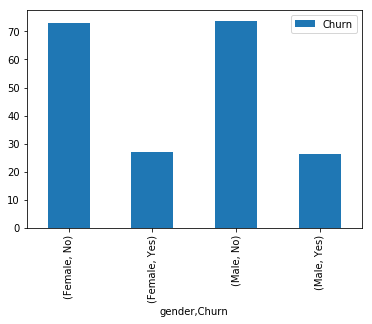

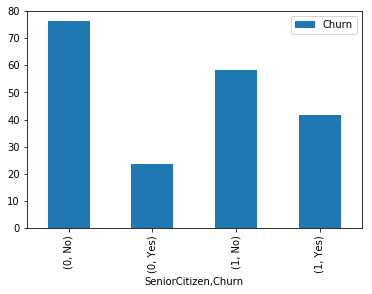

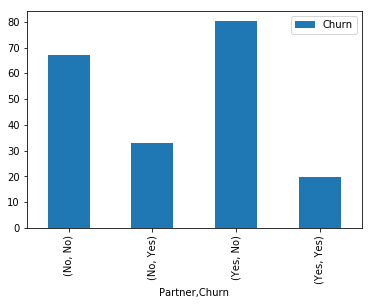

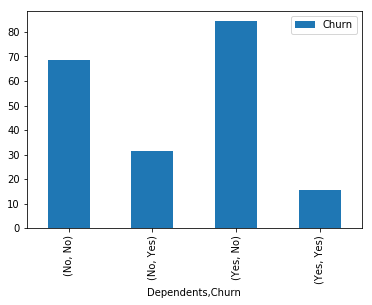

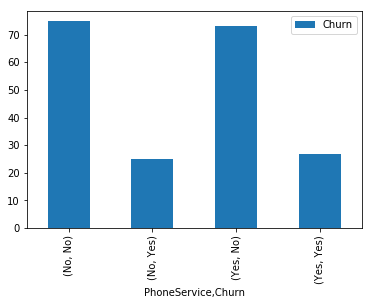

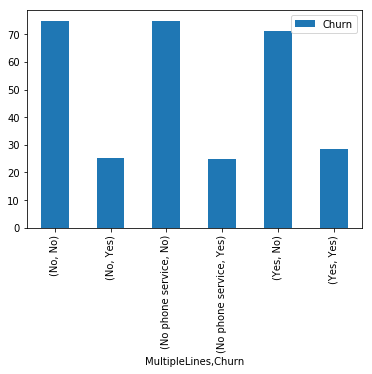

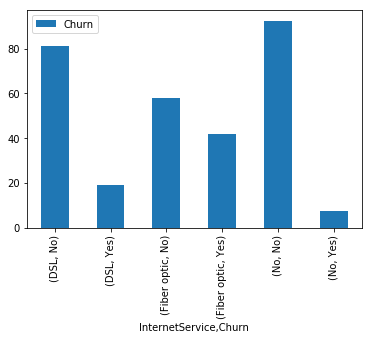

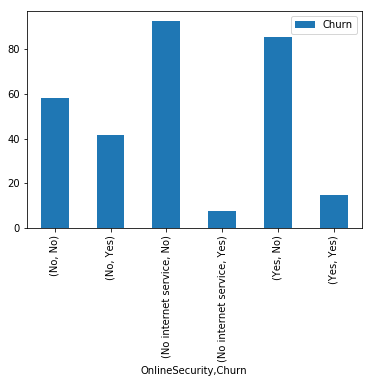

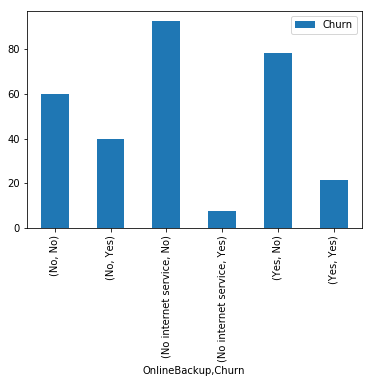

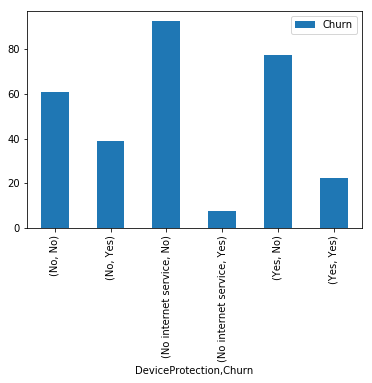

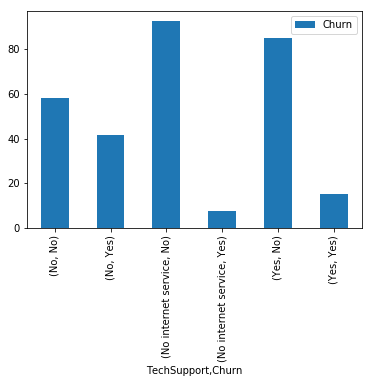

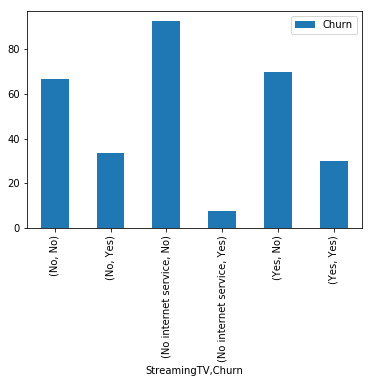

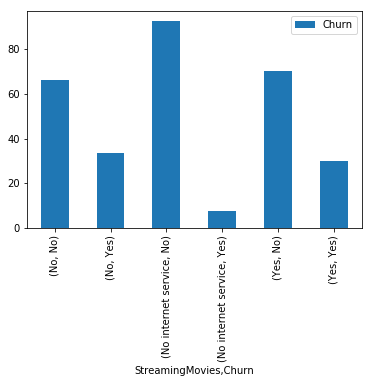

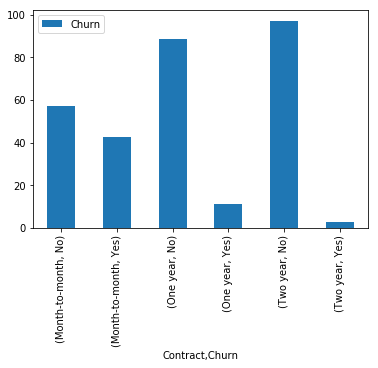

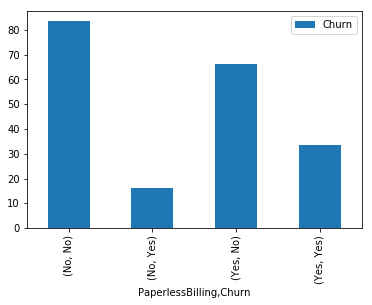

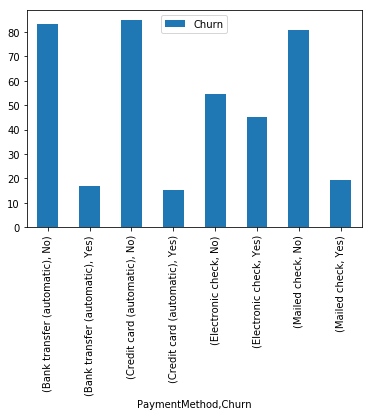

In [19]:
z=objects_ds.columns[0:-1]

for i in z:
    df=churn.groupby([i,'Churn']).agg({'Churn':'count'})
    test_percent=df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    print(test_percent)
    test_percent.plot.bar()

**Descriptive Analysis on the customer data ** 
1.Gender's percentage for male and female with no churn are similar at 76% while remaining 24% decide to change with other provider.  
2.More than 80% of subsribers are coming from non-senior citizen. Over 20% from these non-senior citizen decided to churn.  
3.90% from the registered customer subscribe to phone service.  

**Meaningful pattern ** 
1.Customer with no phone services only interested to subscribe to plan between RM25 to RM55, compare with the phone services which prefer cheaper plan or more expensive plan.  
2.Customer with more expensive plan have the highest probability to churn.  
3.Having a long contract period are the most efficient way to retain customers.  
4.Nearly 80% of customers are subscribing to Fiber Optic and DSL plan which the monthly charges are from RM30 to RM120 and the remaining 20% prefered to cheaper plan at RM20.But nearly half of Fiber Optic subscribers highly choose to changes to other service provider.  
5.Almost 40% of customer tend to choose Movie package with TV package in their subscribing plan. However, they are really concern with the quality of the services which 1 of 3rd may churn to other provide.  
6.Majority (33%) of customers preffered to pay their bill via electronic check compared with other facilities.   futhermore, these type of customer also are the most probability to churn. 


## Prediction analytic

### ML without numeric binning

In [20]:
data=churn
for i in list(data.columns):
    data[i] = pd.Categorical(data[i]) # Convert all the variables into categorical
dummy = pd.get_dummies(data) # Transform the categorical variables into binary vectors

In [21]:
dummy.head(5)

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,tenure_1,tenure_2,...,TotalCharges_8529.5,TotalCharges_8543.25,TotalCharges_8547.15,TotalCharges_8564.75,TotalCharges_8594.4,TotalCharges_8670.1,TotalCharges_8672.45,TotalCharges_8684.8,Churn_No,Churn_Yes
0,1,0,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [22]:
#bin=pd.cut(numeric_ds)

In [23]:
#result without binning the data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import neighbors

features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummy[features].values
Y = dummy["Churn_Yes"].values
h = 0.2 #steps in the mseh

np.random.seed(0)
indices = np.random.permutation(len(X))
n_samples=len(X)
X_train = X[indices[:int(.9 * n_samples)]]
y_train = Y[indices[:int(.9 * n_samples)]]
X_test = X[indices[int(.9 * n_samples):]]
y_test = Y[indices[int(.9 * n_samples):]]

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
#logreg.fit(X, Y)


print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f' % logreg.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.765625
LogisticRegression score: 0.769886


In [24]:
## mse KNN
y_pred = knn.predict(X_test)
y_true = y_test
from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_true, y_pred)
print('KNN MSE: ', + result_mse)

## mse LR
y_pred = logreg.predict(X_test)
y_true = y_test
from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_true, y_pred)
print('LR MSE: ', + result_mse)

KNN MSE:  0.234375
LR MSE:  0.23011363636363635


### ML with numeric binning

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,low,low,low,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,medium,medium,medium,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,low,medium,low,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,medium,medium,medium,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,low,high,low,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


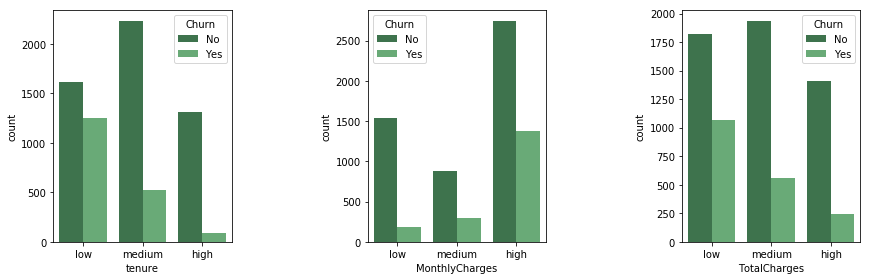

In [25]:
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
MonthlyCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
TotalCharges_bins=pd.cut(numeric_ds["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])

fig, axs = plt.subplots(ncols=3)
sns.countplot(x=tenure_bins, hue="Churn", data=churn, palette="Greens_d",ax=axs[0])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=churn, palette="Greens_d",ax=axs[1])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=churn, palette="Greens_d",ax=axs[2])
fig.tight_layout()
fig.subplots_adjust(right = 2)

data=pd.concat([tenure_bins,MonthlyCharges_bins,TotalCharges_bins,objects_ds],axis=1) 
data.head(5)

In [26]:
for i in list(data.columns):
    data[i] = pd.Categorical(data[i]) # Convert all the variables into categorical
dummy = pd.get_dummies(data) # Transform the categorical variables into binary vectors

In [27]:
dummy.head(5)

,tenure_low,tenure_medium,tenure_high,MonthlyCharges_low,MonthlyCharges_medium,MonthlyCharges_high,TotalCharges_low,TotalCharges_medium,TotalCharges_high,gender_Female,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,1,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,1,1,0
2,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,1,0,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1


In [28]:
#result binning the data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import neighbors
from timeit import default_timer as timer


features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummy[features].values
Y = dummy["Churn_Yes"].values
h = 0.2 #steps in the mseh

np.random.seed(0)
indices = np.random.permutation(len(X))
n_samples=len(X)
X_train = X[indices[:int(.9 * n_samples)]]
y_train = Y[indices[:int(.9 * n_samples)]]
X_test = X[indices[int(.9 * n_samples):]]
y_test = Y[indices[int(.9 * n_samples):]]

start = timer()
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
end = timer()
print(end - start)

start = timer()
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
end = timer()
print(end - start)

e create an instance of Neighbours Classifier and fit the data.
#logreg.fit(X, Y)


#print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
#print('LogisticRegression score: %f' % logreg.fit(X_train, y_train).score(X_test, y_test))





0.17213183023736564
0.050053506248053464


In [29]:
## mse KNN
y_pred = knn.predict(X_test)
y_true = y_test
from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_true, y_pred)
print('KNN MSE: ', + result_mse)

## mse LR
y_pred = logreg.predict(X_test)
y_true = y_test
from sklearn.metrics import mean_squared_error
result_mse = mean_squared_error(y_true, y_pred)
print('LR MSE: ', + result_mse)

KNN MSE:  0.234375
LR MSE:  0.19602272727272727


In [30]:
from sklearn.externals import joblib
joblib.dump(logreg, 'LR_churn.pkl')

['LR_churn.pkl']

## Summarize finding

**Summarize Finding  **
The highest churn rate categories are customers who tend to be ones who are on a month-to-month contract, have fiber optic internet service, and customer made payment with Electronic cheques.  

In order to reduce or minimize churn rate we need to do the following action items:  
1) Need to maintain and improvised existing package plan which are intermediate subscription plan between  25 − 55 and long contract period customer. This can be done by offering short term Value Added Service at no extra cost i.e free additional dataplan, streamingtv, streaming movies. These items are inter-related since they have more dataplan then they can do more tv and movie streaming  
2) Convert any short term subscription plan to long term subscription plan by offering proper incentives i.e. free 20GB data plan for 1 year period  
3) Reduce dependecies on electronic cheque payment instead focus on the other three payment method which are mail cheque, bank transfer and credit card or create more awareness program for customers to used easier payment methods other than electronic cheque  
4) To reduce churn rate of acquiring new customers, we would introduce Sales Intelligent System whereby the system is able to predict suitable mobile plan based on the existing data  

## Reference

http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html#sphx-glr-auto-examples-exercises-plot-digits-classification-exercise-py
http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics
https://lwmachinelearning.wordpress.com/portfolio/customer-churn-analysis/  
https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/  
https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/  
http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html  

